In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import datetime
import seaborn as sns

In [2]:
#read in data
df = pd.read_csv('data.csv')

#look at data
descdf = df.describe()
print(descdf)


# Ensure the data is sorted by date
df = df.sort_values(by='Date')


       house_price_index  new_private_house_owned  home_supply  \
count          84.000000                84.000000    84.000000   
mean          157.274500               941.273810     7.785714   
std            17.585056               456.058608     2.263548   
min           133.991000               478.000000     4.200000   
25%           143.156500               587.500000     6.100000   
50%           148.377000               731.500000     7.550000   
75%           177.927250              1213.750000     9.300000   
max           184.607000              2273.000000    14.300000   

       recession_indicator  federal_rate   real_income  \
count            84.000000     84.000000     84.000000   
mean              0.214286      1.783929  13943.014560   
std               0.412790      2.171063    446.601342   
min               0.000000      0.070000  13214.527000   
25%               0.000000      0.147500  13608.611500   
50%               0.000000      0.190000  13850.489500   

In [3]:

# Lag the independent variables by six months
lagged_df = df.shift(periods=6)


# Drop rows with NaN values created by the lag
lagged_df = lagged_df.dropna()

In [4]:
# Define the independent variables (economic indices)
X = lagged_df[[
    'house_price_index',
    'new_private_house_owned',
    'home_supply',
    'federal_rate',
    'real_income',
    'consumption_price_index',
    'gdp']]

# Define the dependent variable (spread)
y = lagged_df['treasury_maturity']


In [5]:
# get summary with Tukey's five number summary for numerical variables
print(df.dtypes)
print(df.columns)

Date                        object
house_price_index          float64
new_private_house_owned      int64
home_supply                float64
recession_indicator          int64
federal_rate               float64
real_income                float64
consumption_price_index    float64
gdp                        float64
treasury_maturity          float64
period                      object
dtype: object
Index(['Date', 'house_price_index', 'new_private_house_owned', 'home_supply',
       'recession_indicator', 'federal_rate', 'real_income',
       'consumption_price_index', 'gdp', 'treasury_maturity', 'period'],
      dtype='object')


In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [7]:
# Fit Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Get feature importances
feature_importances = model.feature_importances_
# Display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                   Feature  Importance
0        house_price_index    0.318879
3             federal_rate    0.225579
5  consumption_price_index    0.196564
1  new_private_house_owned    0.196456
4              real_income    0.032315
2              home_supply    0.016919
6                      gdp    0.013288


In [9]:
# Predict
y_pred = model.predict(X_test)

In [10]:
# Plot actual vs predicted
df_test = df.iloc[-len(y_test):].copy()
df_test['Predicted Spread'] = y_pred


In [11]:
# create rsquared to judge model performance
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# create mean absolute error to judge model performance
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}:2f')

# create mean squared error to judge model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# create root mean squared error to judge model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# create mean absolute percentage error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}')



R-squared: 0.9514509633854561
Mean Absolute Error: 0.2375692893537778:2f
Mean Squared Error: 0.10384348182536925
Root Mean Squared Error: 0.32224754743111583
Mean Absolute Percentage Error: 36.766588650199616


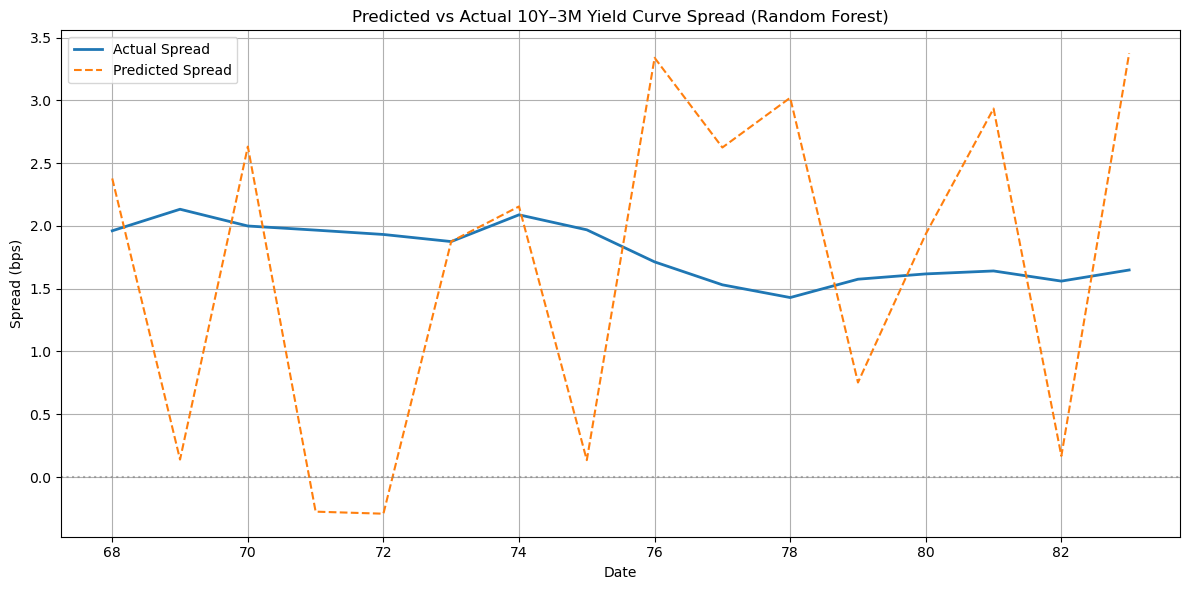

In [12]:

#plot results from random forest regression
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['treasury_maturity'], label='Actual Spread', linewidth=2)
plt.plot(df_test.index, df_test['Predicted Spread'], label='Predicted Spread', linestyle='--')
plt.axhline(0, color='gray', linestyle=':', alpha=0.6)
plt.title("Predicted vs Actual 10Y–3M Yield Curve Spread (Random Forest)")
plt.ylabel("Spread (bps)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

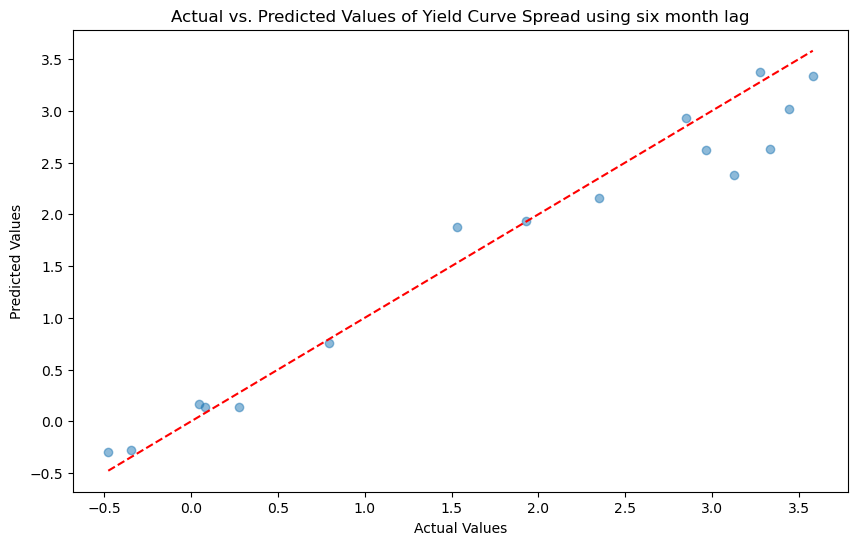

In [13]:
# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values of Yield Curve Spread using six month lag')
plt.show()

In [14]:
# Assuming model is your trained RandomForestRegressor
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


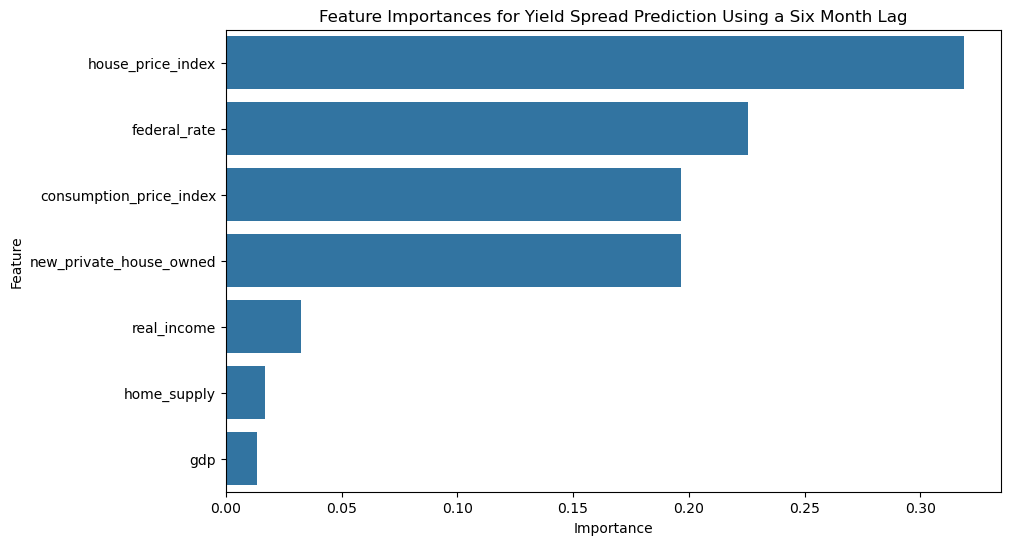

In [15]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Yield Spread Prediction Using a Six Month Lag')
plt.show()
